# Lab 2.06 - Univariate Analysis

## Exercise 6 - Android Persistence

Import all necessary Python libraries and load the Android Persistence dataset from lab exercise 1.02.  Do not forget the conversion to categorical variables. Define an order in case of an ordinal variable.

In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation

bakermiller = "#FF91AF"

In [11]:
# inladen
android_persistence = pd.read_csv('https://raw.githubusercontent.com/HoGentTIN/dsai-labs/refs/heads/main/data/android_persistence_cpu.csv', delimiter=';')
#categorische waarde
android_persistence['PersistenceType'] = android_persistence["PersistenceType"].astype('category')
# ordinale waarde
datasize_type = CategoricalDtype(categories=['Small', 'Medium', 'Large'], ordered=True)
android_persistence['DataSize'] = android_persistence["DataSize"].astype(datasize_type)

Visualise the variables `DataSize` and `PersistenceType` separately using a suitable chart type.

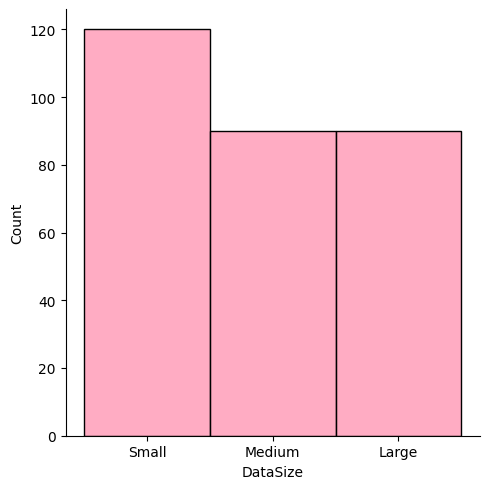

In [16]:
sns.displot(android_persistence, x='DataSize', color=bakermiller)

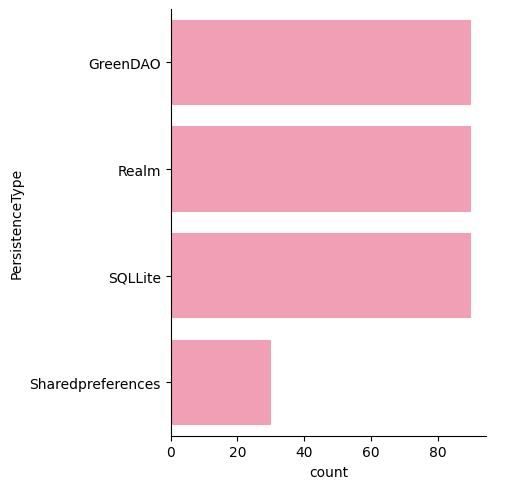

In [25]:
sns.catplot(data=android_persistence, kind='count', y='PersistenceType', color=bakermiller);

How often does each combination of `DataSize` and `PersistenceType` occur? Show the frequencies of `PersistenceType` (parameter `hue`), grouped according to `DataSize` (parameter `x`). Try it the other way round too!

/tmp/ipykernel_377632/161859554.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  android_persistence.PersistenceType.groupby(android_persistence.DataSize).value_counts().unstack().plot(kind='bar', stacked=True, color=[bakermiller, 'lightcoral', 'yellowgreen', 'orange'])


<Axes: xlabel='DataSize'>

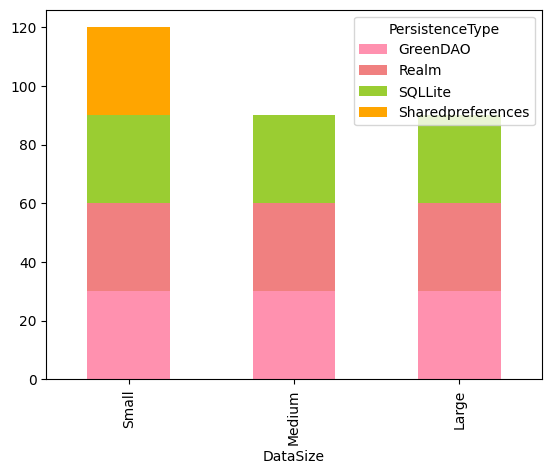

In [45]:
android_persistence.PersistenceType.groupby(android_persistence.DataSize).value_counts().unstack().plot(kind='bar', stacked=True, color=[bakermiller, 'lightcoral', 'yellowgreen', 'orange'])

Visualise the variable `Time` with a boxplot, each time with more detail. Do you notice how you get a better view of the data each time you do this?

- First over the entire dataset (parameter `x`)
  


<Axes: xlabel='Time'>

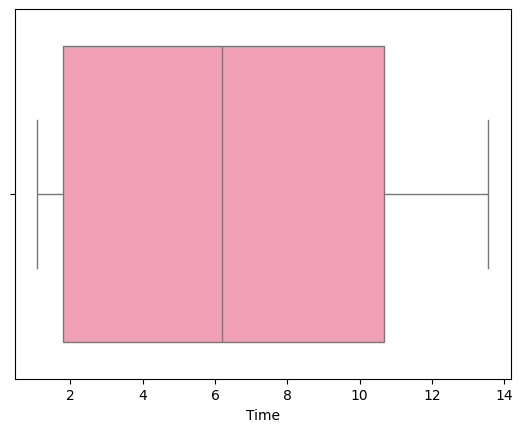

In [47]:
sns.boxplot(data=android_persistence, x='Time', color=bakermiller)

- Then grouped according to `DataSize` (parameter `y`)
  


<Axes: xlabel='Time', ylabel='DataSize'>

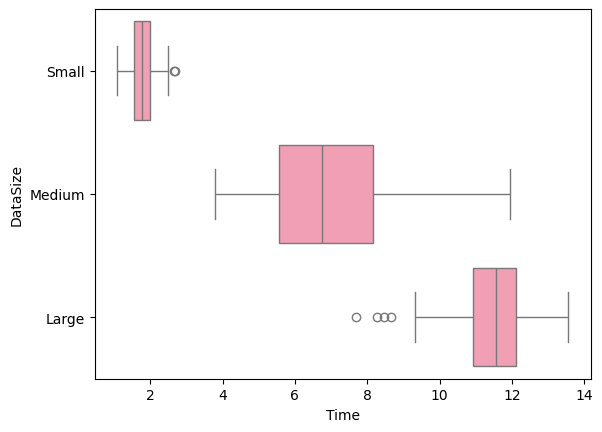

In [48]:
sns.boxplot(data=android_persistence, x='Time', y='DataSize', color=bakermiller)

- Finally, split it according to `PersistenceType` (parameter `hue`)

<Axes: xlabel='Time', ylabel='DataSize'>

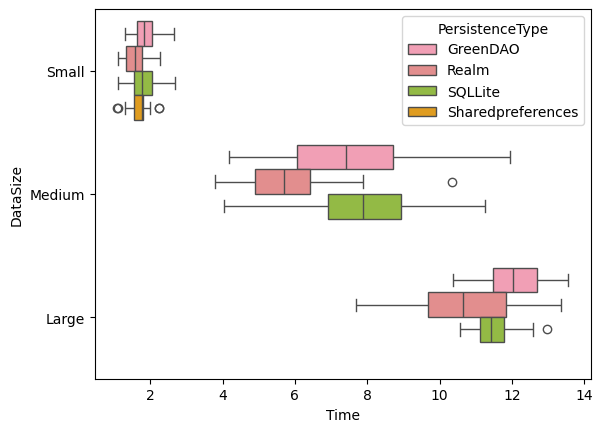

In [56]:
sns.boxplot(data=android_persistence, x='Time', y='DataSize', hue='PersistenceType', 
            palette=[bakermiller, 'lightcoral', 'yellowgreen', 'orange'])

**(Challenge)** Try to do something similar with a density graph: for each value of `DataSize`, show a scatter diagram showing a density graph of the variable `Time` for each value of `PersistenceType` (tip: `sns.FacetGrid()`). The result may look something like this:

![Density graphs for each `DataSize`, comparing the performance of different `PersistenceTypes`](img/persistence-density.png)

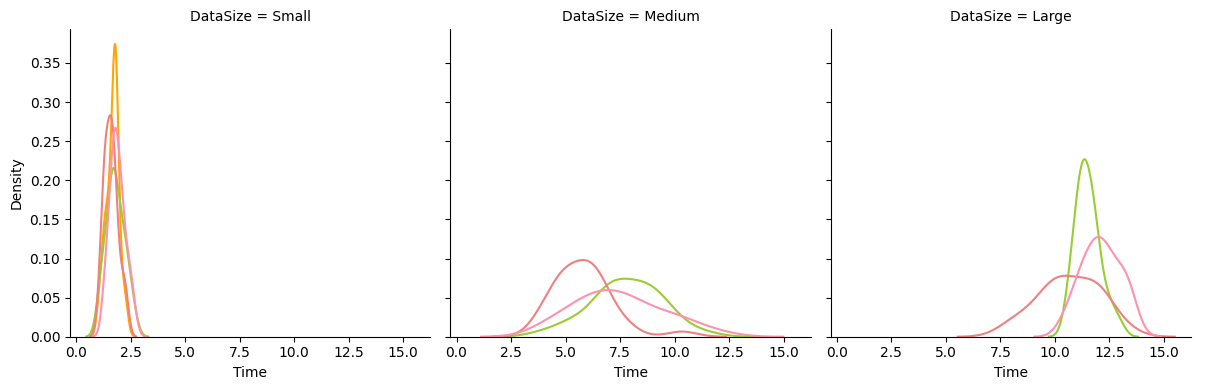

In [63]:
g = sns.FacetGrid(android_persistence, col="DataSize", height=4)
g.map_dataframe(sns.kdeplot, x="Time", hue="PersistenceType", 
                palette=[bakermiller, 'lightcoral', 'yellowgreen', 'orange'])
g.add_legend()
plt.tight_layout()

Calculate sample mean and standard deviation of `Time`.

- Across the whole dataset
  


In [73]:
print(f"sample mean accros whole dataset: {android_persistence.Time.mean():.3f}")

sample mean accros whole dataset: 6.231


- Broken down according to `DataSize`
  


In [77]:
for a in android_persistence.DataSize.unique():
    print(f"sample mean broken down according to Datasize {a}: {android_persistence[android_persistence.DataSize == a].Time.mean():.3f}")

sample mean broken down according to Datasize Small: 1.741
sample mean broken down according to Datasize Medium: 7.022
sample mean broken down according to Datasize Large: 11.426


- Broken down according to `PersistenceType`
  


In [78]:
for a in android_persistence.PersistenceType.unique():
    print(f"sample mean broken down according to PersistenceType {a}: {android_persistence[android_persistence.PersistenceType == a].Time.mean():.3f}")

sample mean broken down according to PersistenceType Sharedpreferences: 1.674
sample mean broken down according to PersistenceType GreenDAO: 7.153
sample mean broken down according to PersistenceType SQLLite: 7.036
sample mean broken down according to PersistenceType Realm: 6.023


- Broken down according to `DataSize` and `PersistenceType`

In [83]:
for a in android_persistence.PersistenceType.unique():
    for b in android_persistence.DataSize.unique():
        c = android_persistence[(android_persistence.DataSize == b) & (android_persistence.PersistenceType == a)].Time.mean()
        if len(android_persistence[(android_persistence.DataSize == b) & (android_persistence.PersistenceType == a)]) != 0:
            print(f"Sample mean for DataSize '{b}' and PersistenceType '{a}': {c:.3f}.")

Sample mean for DataSize 'Small' and PersistenceType 'Sharedpreferences': 1.674.
Sample mean for DataSize 'Small' and PersistenceType 'GreenDAO': 1.894.
Sample mean for DataSize 'Medium' and PersistenceType 'GreenDAO': 7.454.
Sample mean for DataSize 'Large' and PersistenceType 'GreenDAO': 12.110.
Sample mean for DataSize 'Small' and PersistenceType 'SQLLite': 1.799.
Sample mean for DataSize 'Medium' and PersistenceType 'SQLLite': 7.794.
Sample mean for DataSize 'Large' and PersistenceType 'SQLLite': 11.515.
Sample mean for DataSize 'Small' and PersistenceType 'Realm': 1.599.
Sample mean for DataSize 'Medium' and PersistenceType 'Realm': 5.818.
Sample mean for DataSize 'Large' and PersistenceType 'Realm': 10.652.


## Expected results

As a check, you can find the expected results here (max. 3 decimal places):

| Statistic         | Mean   | Standard deviation |
| :---------------- | :----- | :----------------- |
| Whole dataset     | 6.231  | 4.230              |
| Small             | 1.741  | 0.359              |
| Medium            | 7.022  | 1.864              |
| Large             | 11.426 | 1.164              |
| GreenDAO          | 7.152  | 4.386              |
| Realm             | 6.023  | 3.884              |
| SQLite            | 7.036  | 4.146              |
| SharedPreferences | 1.674  | 0.285              |

Split on both criteria:

| Sample mean       | Small | Medium | Large  |
| :---------------- | :---- | :----- | :----- |
| GreenDAO          | 1.894 | 7.454  | 12.110 |
| Realm             | 1.599 | 5.818  | 10.652 |
| SQLite            | 1.799 | 7.794  | 11.515 |
| SharedPreferences | 1.674 | -      | -      |

| Standard deviation | Small | Medium | Large |
| :----------------- | :---- | :----- | :---- |
| GreenDAO           | 0.348 | 2.007  | 0.868 |
| Realm              | 0.315 | 1.331  | 1.406 |
| SQLite             | 0.416 | 1.599  | 0.559 |
| SharedPreferences  | 0.285 | -      | -     |
